#Workhop Python Hari Kedua

In [1]:
# Import modules 
import pandas as pd
import numpy as np

In [2]:
# Import modules untuk Data Visualization
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()

#Data Text (Corona Tweet)

Data text yang berisi original tweet mengenai kasus corona. Pada data ini akan ditunjukkan kata-kata yang sedang banyak diperbincangkan menggunakan library Wordcloud.

In [3]:
# Import Dataset in Worksheet
dfText = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')

# Untuk melihat 5 dataset terakhir
dfText.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [4]:
# Dataset Size
dfText.shape

(41157, 6)

In [5]:
# Cek Missing Value
dfText.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
# Ambil original tweet saja
x = dfText['OriginalTweet'].copy()

##Data Cleaning

In [7]:
# String manipulation
import re

In [8]:
# corpus
from nltk.corpus import stopwords

#if you dont have, let download the library firstly
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def data_cleaner(tweet):
    tweet = re.sub(r'http\S+', ' ', tweet)   # remove urls
    tweet = re.sub(r'<.*?>',' ', tweet)      # remove html tags
    tweet = re.sub(r'\d+',' ', tweet)        # remove digits
    tweet = re.sub(r'#\w+',' ', tweet)       # remove hashtags
    tweet = re.sub(r'@\w+',' ', tweet)       # remove mentions
    tweet = re.sub(r'amp', ' ', tweet)       # remove amp
    tweet = " ".join([word.lower() for word in tweet.split() if not word in stop_words])   # remove stop words
    return tweet

stop_words = stopwords.words('english')
x_cleaned = x.apply(data_cleaner)
x_cleaned.head()

0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    my food stock one empty... please, panic, ther...
4    me, ready go supermarket outbreak. not i'm par...
Name: OriginalTweet, dtype: object

##Data Visualization

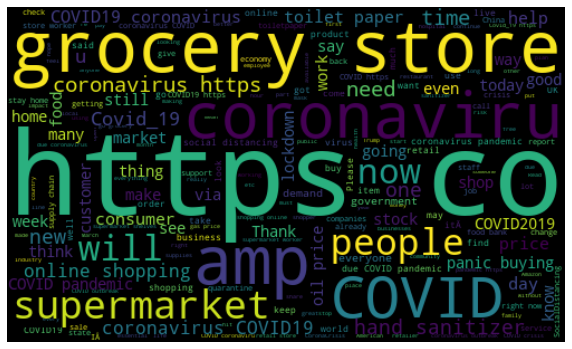

In [10]:
# Sebelum Data Cleaning
import wordcloud
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in dfText['OriginalTweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize = (10, 8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

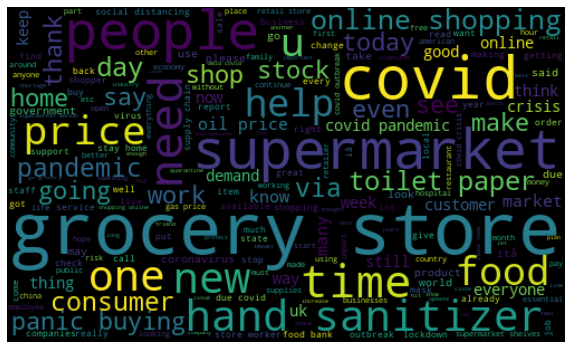

In [11]:
# Sesudah Data Cleaning
import wordcloud
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in x_cleaned])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize = (10, 8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Pada kedua visualisasi tersebut kata yang ditunjukkan paling besar font sizenya merupakan kata yang paling sering keluar pada tweet. Perbedaan yang sangat jelas juga dtampilkan ketika sebelum dan sesudah data cleaning.

#Data Iris

Data Iris merupakan data bunga Iris yang memiliki 4 variabel taitu lebar dan panjang sepal serta lebar dan panjang petal. Data ini akan diklasifikan menjadi 3 species yaitu species 1, species 2, species 3. Pada kasus ini, akan dicoba memecahkan masalah tersebut dengan metode Regresi Logistik dan Neural Network.

In [12]:
# Import Dataset in Worksheet
dfIris = pd.read_csv('/content/dataIris.csv')

# Untuk melihat 5 dataset terakhir
dfIris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


In [13]:
# Cek apakah pada dataset terdapat nilai kosong
dfIris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data Iris bisa langsung digunakan karena sudah tidak terdapat nilai kosong yang artinya data tersebut telah bersih dan tidak perlu dilakukan data cleaning.

In [14]:
# Mendeskripsikan dataset
dfIris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [15]:
# Menampilkan data sasaran dari Species
classSpec = dfIris.groupby('Species')
classSpec.mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
1,5.006,3.418,1.464,0.244
2,5.936,2.770,4.260,1.326
3,6.588,2.974,5.552,2.026


##Data Visualization (dataIris)

###Visualisasi Data dengan Histogram

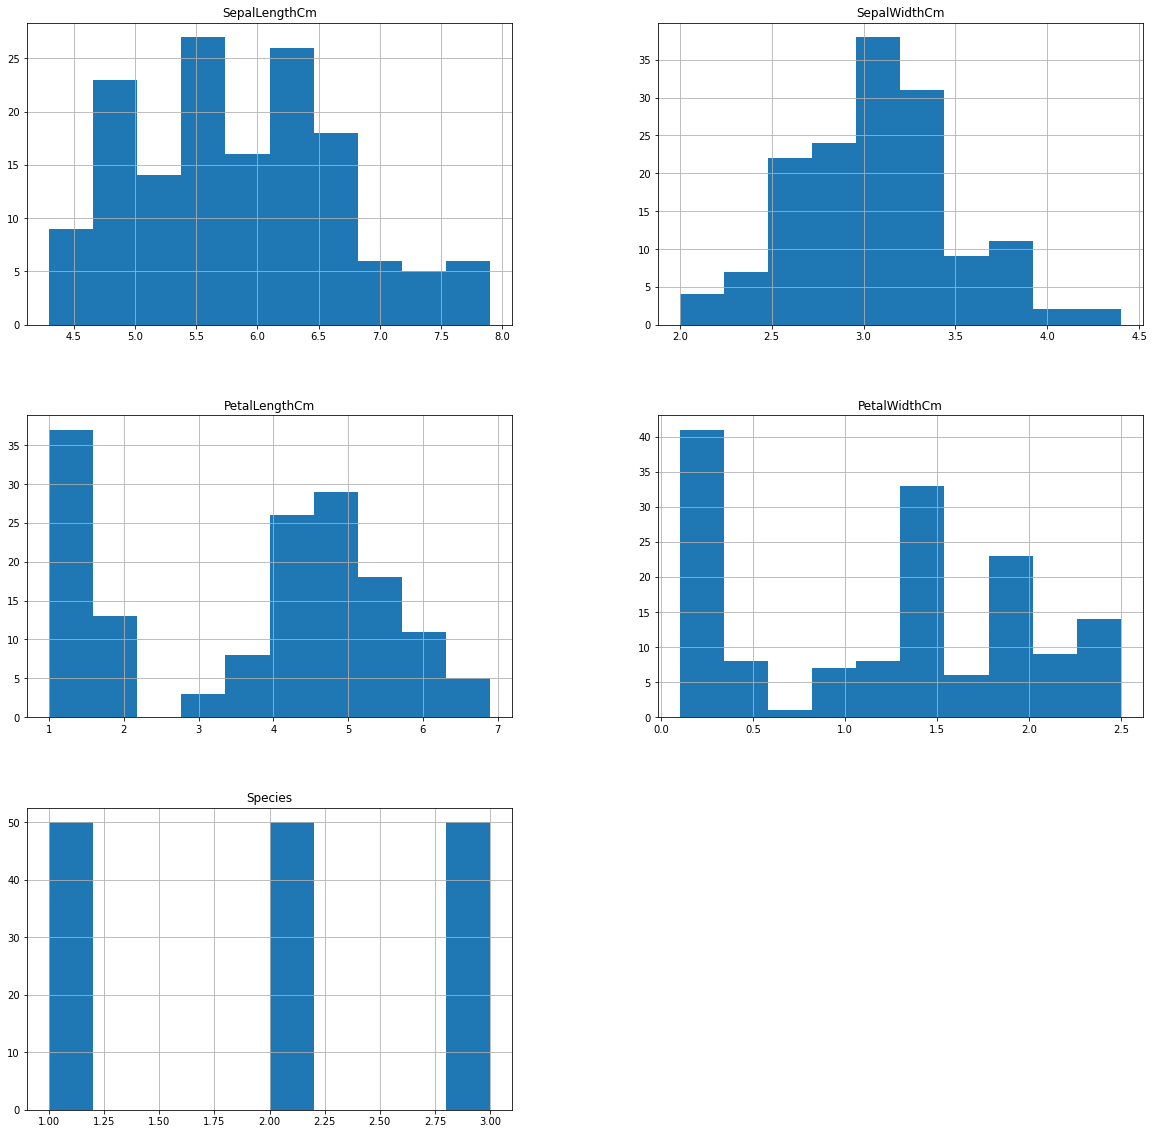

In [16]:
# Menampilkan histogram masing-masing variabel
dfIris.hist(figsize=(20,20))
plt.show()

###Visualisasi Data berupa garis

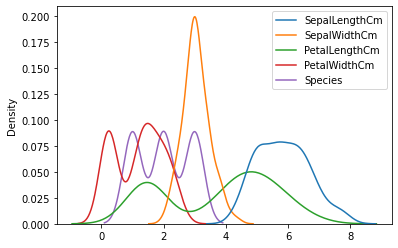

In [17]:
sns.kdeplot(data=dfIris)
plt.show()

Number of sepal length from 4.3 to 7.9 cm.


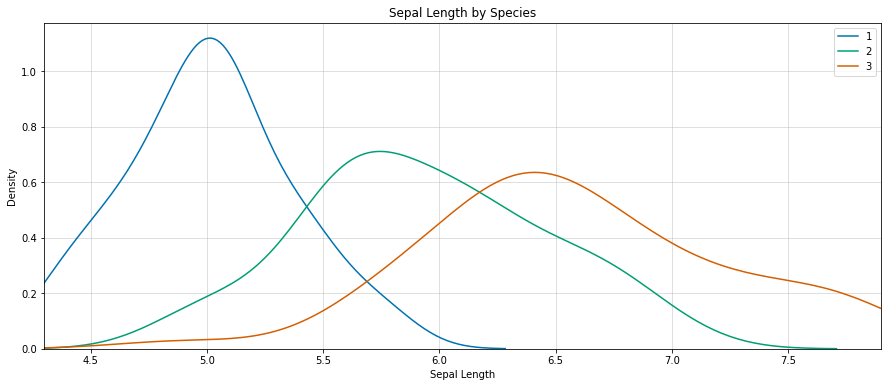

In [18]:
#Variabel SepalLengthCm
print("Number of sepal length from {} to {} cm.".format(
    dfIris['SepalLengthCm'].min(), dfIris['SepalLengthCm'].max()))

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dfIris.loc[dfIris['Species'] == 1, 'SepalLengthCm'], label = '1')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 2, 'SepalLengthCm'], label = '2')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 3, 'SepalLengthCm'], label = '3')
plt.xlim(left=4.3, right=7.9)
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Sepal Length by Species')
plt.legend()
plt.show()

Number of sepal width from 2.0 to 4.4 cm.


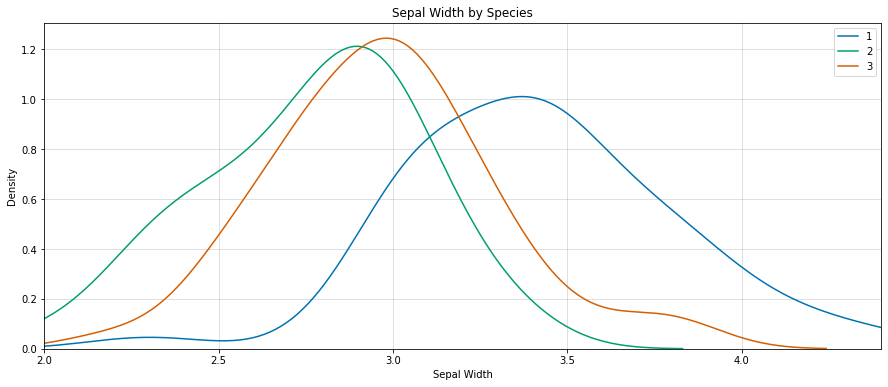

In [19]:
#Variabel SepalWidthCm
print("Number of sepal width from {} to {} cm.".format(
    dfIris['SepalWidthCm'].min(), dfIris['SepalWidthCm'].max()))

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dfIris.loc[dfIris['Species'] == 1, 'SepalWidthCm'], label = '1')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 2, 'SepalWidthCm'], label = '2')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 3, 'SepalWidthCm'], label = '3')
plt.xlim(left=2, right=4.4)
plt.xlabel('Sepal Width')
plt.ylabel('Density')
plt.title('Sepal Width by Species')
plt.legend()
plt.show()

Number of petal length from 1.0 to 6.9 cm.


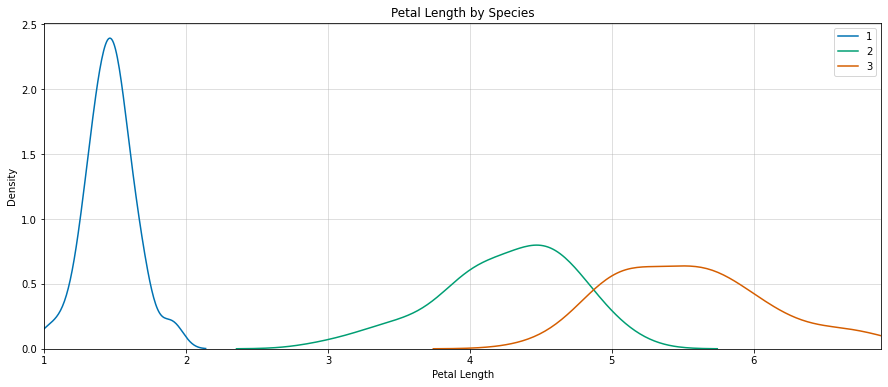

In [20]:
#Variabel PetalLengthCm
print("Number of petal length from {} to {} cm.".format(
    dfIris['PetalLengthCm'].min(), dfIris['PetalLengthCm'].max()))

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dfIris.loc[dfIris['Species'] == 1, 'PetalLengthCm'], label = '1')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 2, 'PetalLengthCm'], label = '2')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 3, 'PetalLengthCm'], label = '3')
plt.xlim(left=1, right=6.9)
plt.xlabel('Petal Length')
plt.ylabel('Density')
plt.title('Petal Length by Species')
plt.legend()
plt.show()

Number of petal width from 0.1 to 2.5 cm.


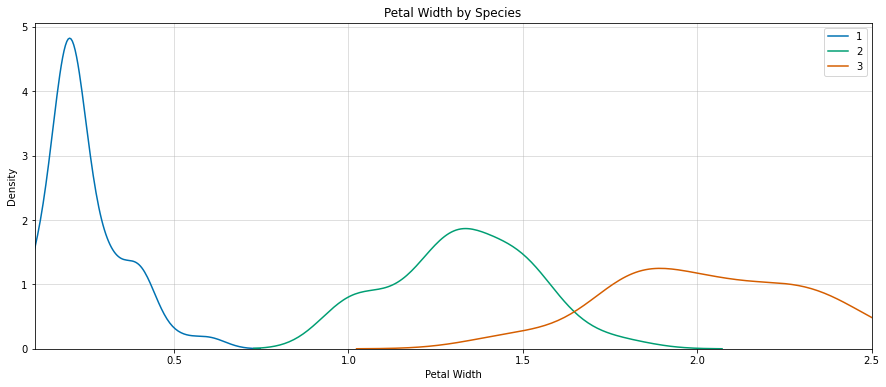

In [21]:
#Variabel PetalWidthCm
print("Number of petal width from {} to {} cm.".format(
    dfIris['PetalWidthCm'].min(), dfIris['PetalWidthCm'].max()))

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(dfIris.loc[dfIris['Species'] == 1, 'PetalWidthCm'], label = '1')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 2, 'PetalWidthCm'], label = '2')
sns.kdeplot(dfIris.loc[dfIris['Species'] == 3, 'PetalWidthCm'], label = '3')
plt.xlim(left=0.1, right=2.5)
plt.xlabel('Petal Width')
plt.ylabel('Density')
plt.title('Petal Width by Species')
plt.legend()
plt.show()

###Visualisasi Data dengan scatter plot

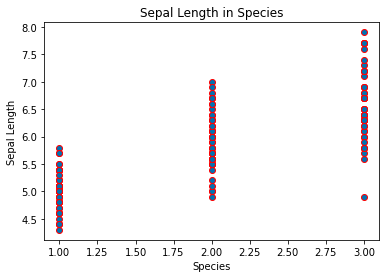

In [22]:
# Variabel Sepal Length
spec = dfIris['Species']
sepalLength = dfIris['SepalLengthCm']
plt.scatter(spec, sepalLength, edgecolors='r')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Sepal Length in Species')
plt.show()

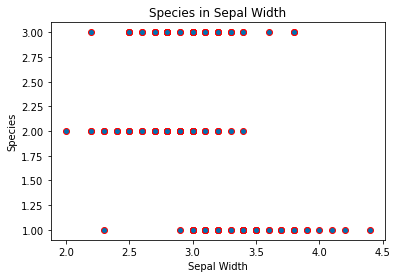

In [23]:
# Variabel Sepal Width
spec = dfIris['Species']
sepalWidth = dfIris['SepalWidthCm']
plt.scatter(sepalWidth, spec, edgecolors='r')
plt.xlabel('Sepal Width')
plt.ylabel('Species')
plt.title('Species in Sepal Width')
plt.show()

###Visualisasi Data dengan BoxPlot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


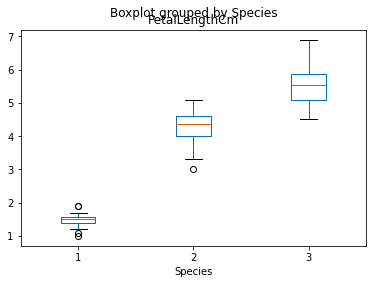

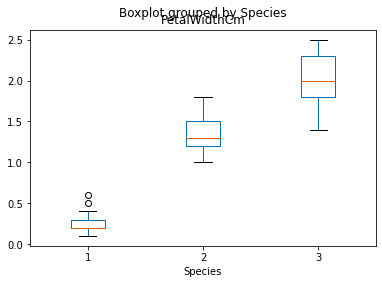

In [24]:
ax1 = dfIris.boxplot(by ='Species', column =['PetalLengthCm'], grid = False)
ax2 = dfIris.boxplot(by ='Species', column =['PetalWidthCm'], grid = False)
plt.subplot()
plt.show()

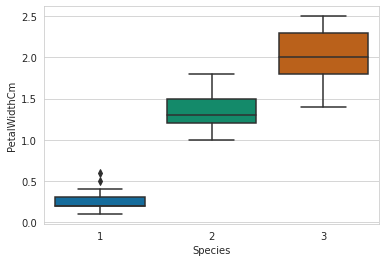

In [25]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = dfIris)
plt.show()

##Korelasi Data Iris

Korelasi adalah teknik statistik yang digunakan untuk meguji ada/tidaknya hubungan serta arah hubungan dari dua variabel atau lebih.

Koefisien Korelasi:
Besar kecilnya hubungan antara dua variabel dinyatakan dalam bilangan yang disebut Koefisien Korelasi:

a. Besarnya Koefisien antara   -1   0  +1

b. Besaran koefisien -1 & 1 adalah hubungan yang sempurna

c. Nilai Koefisien 0 atau mendekati 0 dianggap tidak berhubungan antara dua variabel yang diuji

ARAH HUBUNGAN

a. Positif (Koefisien 0 s/d 1);
b. Negatif (Koefisien 0 s/d -1);
c. Nihil (Koefisien 0).

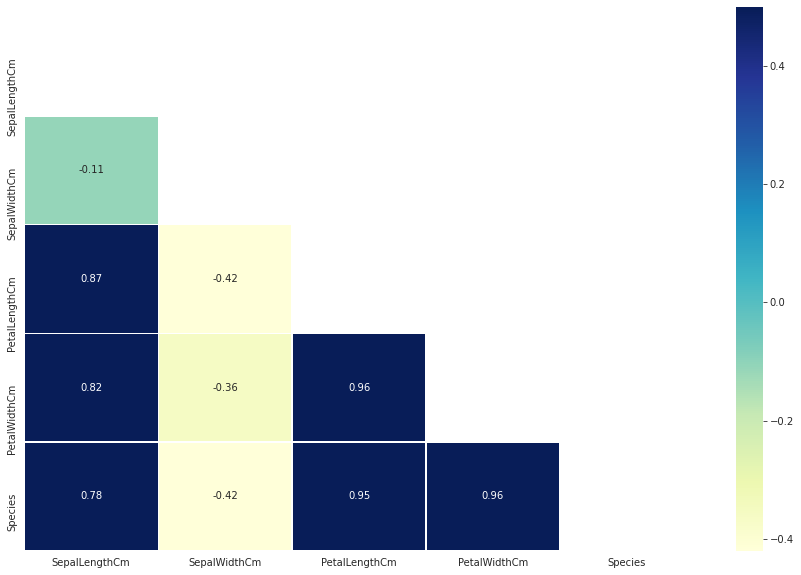

In [26]:
# Mencari korelasi antar variabel dengan target
corr = dfIris.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

Berdasarkan gambar tersebut, variabel yang memiliki korelasi positif terhadap variabek Species, yaitu PetalLengthCm, PetalWidthCm

##Spliting Data

Splitting data merupakan teknik untuk memisahkan data training dengan data testing. Data training digunakan untuk melatih model sedangan data testing untuk menguji model yang telah dilatih.

In [27]:
# Copy Datase
target = dfIris['Species'].copy()

In [28]:
type(target)

pandas.core.series.Series

In [29]:
dfIris.drop(['Species'], axis=1, inplace=True)

In [30]:
print('Size of Full dataset is: {}'.format(dfIris.shape))

Size of Full dataset is: (150, 4)


In [31]:
# import 'train_test_split' untuk splitting data
from sklearn.model_selection import train_test_split 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dfIris,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (112, 4)
Number transactions y_train dataset:  (112,)
Number transactions X_test dataset:  (38, 4)
Number transactions y_test dataset:  (38,)


## Modelling DataSet

###Regresi Logistik

Regresi logistik merupakan salah satu jenis regresi yang menghubungkan antara satu atau beberapa variabel independen (variabel bebas) dengan variabel dependen yang berupa kategori.

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logReg = LogisticRegression()
print(logReg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [35]:
modelLR = logReg.fit(X_train, y_train)

In [36]:
print('intercept:', modelLR.intercept_)
print('coefficient:', modelLR.coef_[0])

intercept: [  9.19776002   1.87915209 -11.07691211]
coefficient: [-0.41691155  0.85707147 -2.29796715 -1.00403274]


Persamaan model regresi logistik: logit(p) = log(p/(1-p))= β0 + β1*x1 + … + βk*xk

dengan β0 yaitu intercept dari variabel target dan β1, β2, β3, β4 adalah koefisien dari masing-masing variabel

In [37]:
import joblib

In [38]:
# Save model
saveModelLR = 'finalized_modelLR.sav'
joblib.dump(modelLR, saveModelLR)

['finalized_modelLR.sav']

####Evaluasi pada Training Data

In [39]:
# Common sklearn Model Helpers
from sklearn import metrics

In [40]:
# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
# Load Model
loadModelLR = joblib.load(saveModelLR)

In [42]:
# Evaluate on training data
prediksi = loadModelLR.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediksi)
print("Accuracy: {0:.2f}".format(accuracy * 100.0))

Accuracy: 97.32


In [43]:
print("Classification Report:")
print(metrics.classification_report(y_train, prediksi))

#Interpretasi (akurasi, sensitivitas)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       0.97      0.95      0.96        37
           3       0.95      0.97      0.96        38

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [44]:
clsMatrixLR = metrics.confusion_matrix(y_train, prediksi)
print("Confusion Matrix:")
print(clsMatrixLR)

Confusion Matrix:
[[37  0  0]
 [ 0 35  2]
 [ 0  1 37]]


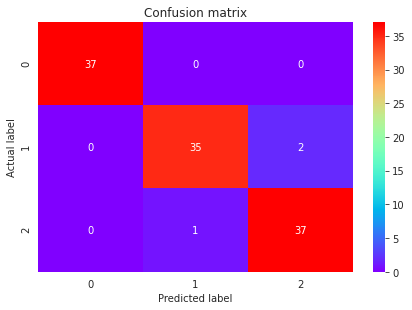

In [45]:
# create heatmap
sns.heatmap(pd.DataFrame(clsMatrixLR), annot=True, cmap="rainbow" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

####Evaluasi pada Testing Data

In [46]:
# Evaluate on training data
prediksi = modelLR.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediksi)
print("Accuracy: {0:.2f}".format(accuracy * 100.0))

Accuracy: 97.37


In [47]:
print("Classification Report:")
print(metrics.classification_report(y_test, prediksi))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.92      0.96        13
           3       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



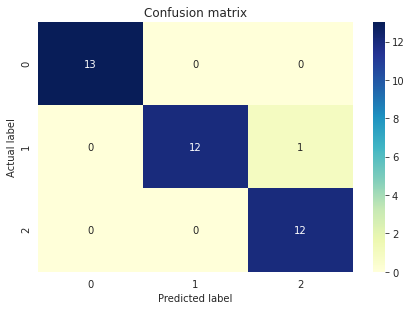

In [122]:
clsMatrixLR = metrics.confusion_matrix(y_test, prediksi)

# create heatmap
sns.heatmap(pd.DataFrame(clsMatrixLR), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

###Neural Network

Jaringan Syaraf Tiruan merupakan sebuah teknik atau pendekatan pengolahan informasi yang terinspirasi oleh cara kerja sistem saraf biologis, khususnya pada sel otak manusia dalam memproses informasi. Elemen kunci dari teknik ini adalah struktur sistem pengolahan informasi yang bersifat unik dan beragam untuk tiap aplikasi. Neural Network terdiri dari sejumlah besar elemen pemrosesan informasi (neuron) yang saling terhubung dan bekerja bersama-sama untuk menyelesaikan sebuah masalah tertentu, yang pada umumnya dalah masalah klasifikasi ataupun prediksi.

In [49]:
import sklearn.neural_network 

In [50]:
  model = sklearn.neural_network.MLPClassifier()
  model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
# Train model
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
# Save model
saveModelNN = 'finalized_modelNN.sav'
joblib.dump(model, saveModelNN)

['finalized_modelNN.sav']

####Evaluasi pada Training Data

In [53]:
# Load Model
loadModelNN = joblib.load(saveModelNN)

In [54]:
# Evaluate on training data
predictions = loadModelNN.predict(X_train)
accuracy = metrics.accuracy_score(y_train, predictions)
print("Accuracy: {0:.2f}".format(accuracy * 100.0))

Accuracy: 96.43


In [55]:
print("Classification Report:")
print(metrics.classification_report(y_train, predictions))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      0.89      0.94        37
           3       0.90      1.00      0.95        38

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.97      0.96      0.96       112



In [56]:
clsMatrix = metrics.confusion_matrix(y_train, predictions)
print("Confusion Matrix:")
print(clsMatrix)

Confusion Matrix:
[[37  0  0]
 [ 0 33  4]
 [ 0  0 38]]


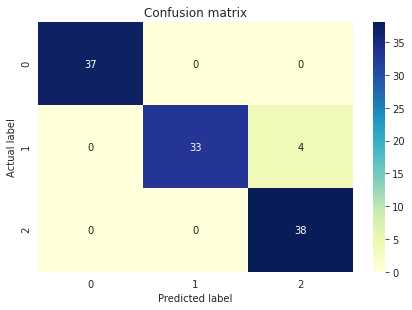

In [123]:
# create heatmap
sns.heatmap(pd.DataFrame(clsMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

####Evaluasi pada Testing Data

In [58]:
# Evaluate on test data
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

Accuracy: 97.37


In [59]:
print('Classification Report:')
print(metrics.classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.92      0.96        13
           3       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [60]:
clsMatrixTest = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ")
print(clsMatrixTest)

Confusion Matrix: 
[[13  0  0]
 [ 0 12  1]
 [ 0  0 12]]


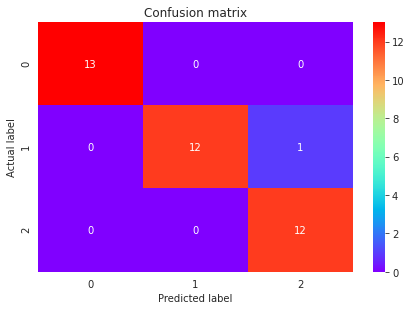

In [124]:
# create heatmap
sns.heatmap(pd.DataFrame(clsMatrixTest), annot=True, cmap="rainbow" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Data Hotel

Data ini merupakan data hotel. Pada kasus ini akan dilakukan prediksi kemungkinan jumlah pengunjung menggunakan neural network.

In [62]:
# Import Dataset in Worksheet
dfH = pd.read_csv('/content/dataHotel.csv', encoding='latin1')

# Untuk melihat 5 dataset terakhir
dfH.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14
40059,0,161,2017,August,35,31,4,10,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,69,NULL,0,Transient,99.06,0,0,Check-Out,2017-09-14


In [63]:
dfH.shape

(40060, 31)

In [64]:
# Cek Missing Value
dfH.isna().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [65]:
dfH.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [66]:
train_df = dfH

In [67]:
# Variabel numerik yang digunakan
arrivaldateweekno = train_df ['ArrivalDateWeekNumber']
adr = train_df['ADR']
rcps = train_df['RequiredCarParkingSpaces']

In [68]:
# Variabel kategorial yang digunakan
IsCanceled = train_df['IsCanceled']
arrivaldatemonth = train_df.ArrivalDateMonth.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
countrycat=train_df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
deposittypecat=train_df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)

In [69]:
y1 = np.array(adr)

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
# Encode dari pandas ke numpy
x1 = np.column_stack((IsCanceled,countrycat,marketsegmentcat,deposittypecat,customertypecat,rcps,arrivaldateweekno))
x1 = sm.add_constant(x1, prepend=True)

##Splitting Data (Training dan Validation Data)

In [72]:
# Import module scaler
from sklearn.preprocessing import MinMaxScaler

In [73]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [74]:
#Variables
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [75]:
ytrain_scale

array([[0.0901668 ],
       [0.42309188],
       [0.16812473],
       ...,
       [0.22761383],
       [0.32734554],
       [0.14325985]])

In [76]:
yval_scale

array([[0.24256293],
       [0.06636156],
       [0.39542334],
       ...,
       [0.15675057],
       [0.14462243],
       [0.14187643]])

In [77]:
xtrain_scale

array([[0.        , 0.        , 0.768     , ..., 0.66666667, 0.        ,
        0.17307692],
       [0.        , 0.        , 0.16      , ..., 0.66666667, 0.        ,
        0.55769231],
       [0.        , 1.        , 0.448     , ..., 0.66666667, 0.        ,
        0.44230769],
       ...,
       [0.        , 1.        , 0.768     , ..., 1.        , 0.        ,
        0.67307692],
       [0.        , 0.        , 0.448     , ..., 0.66666667, 0.        ,
        0.40384615],
       [0.        , 0.        , 0.368     , ..., 1.        , 0.        ,
        0.78846154]])

In [78]:
xval_scale

array([[0.        , 0.        , 0.95967742, ..., 0.66666667, 0.        ,
        0.80769231],
       [0.        , 0.        , 0.08870968, ..., 1.        , 0.        ,
        0.15384615],
       [0.        , 1.        , 0.77419355, ..., 0.66666667, 0.        ,
        0.51923077],
       ...,
       [0.        , 0.        , 0.27419355, ..., 0.66666667, 0.        ,
        0.69230769],
       [0.        , 0.        , 0.77419355, ..., 0.66666667, 0.        ,
        0.42307692],
       [0.        , 0.        , 0.27419355, ..., 0.66666667, 0.        ,
        0.34615385]])

##Modelling (Konfigurasi Neural Network)

In [79]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [80]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='elu'))
model.add(Dense(2670, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              24030     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 26,773
Trainable params: 26,773
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)


Epoch 1/30
161/161 [==============================] - 2s 9ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0955 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0887
Epoch 2/30
161/161 [==============================] - 1s 6ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0886 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0843
Epoch 3/30
161/161 [==============================] - 1s 6ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0872 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0883
Epoch 4/30
161/161 [==============================] - 1s 7ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0888 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0847
Epoch 5/30
161/161 [==============================] - 1s 6ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0878 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0878
Epoch 6/30
161/161 [==============================] - 1s 6ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0893 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0851
Epoch 7/30
161/1

In [82]:
# Save model
model.save("modelNN2")
print("Saved model to disk")

INFO:tensorflow:Assets written to: modelNN2/assets
Saved model to disk


In [83]:
# Import modul load 
from keras.models import load_model

In [84]:
# Load Model
loadModelNN2 = load_model('modelNN2')

In [85]:
predictions = loadModelNN2.predict(xval_scale)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


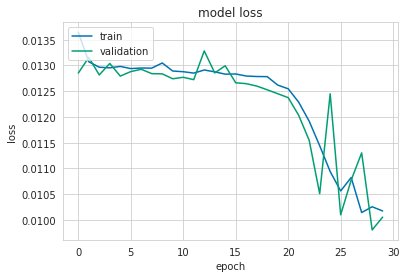

In [86]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Akurasi Data Train

In [87]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [88]:
predictions = scaler_y.inverse_transform(predictions)
print(predictions)

[[108.83584 ]
 [ 58.541454]
 [126.78984 ]
 ...
 [ 97.87167 ]
 [113.58288 ]
 [102.892265]]


Dalam MAE (Mean Absolute Error) kesalahan dihitung sebagai rata-rata perbedaan absolut antara nilai target dan prediksi. MAE adalah skor linier yang berarti bahwa semua perbedaan individu diberi bobot yang sama rata-rata. 

In [89]:
mean_absolute_error(y_val, predictions)

38.82082840713524

MSE pada dasarnya mengukur kesalahan kuadrat rata-rata dari prediksi kita. Untuk setiap poin, ia menghitung selisih kuadrat antara prediksi dan target kemudian merata-rata nilai-nilai itu. Semakin tinggi nilai ini, semakin buruk modelnya. Nilai MSE tidak pernah negatif, karena kita menguadratkan kesalahan prediksi individu sebelum menjumlahkannya, tetapi akan menjadi nol untuk model yang sempurna.

In [90]:
import math

In [91]:
mean_squared_error(y_val, predictions)
math.sqrt(mean_squared_error(y_val, predictions))

52.285359770545135

In [92]:
np.mean(y_val)

95.34083175237144

In [93]:
np.mean(predictions)

93.218636

##Evaluasi pada Data Test

In [94]:
dfH2 = pd.read_csv('dataHotelTest.csv')
dfH2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [95]:
dfH2.shape

(79330, 31)

In [96]:
h2data = dfH2

In [97]:
# Numerical Variable
t_arrivaldateweekno = h2data['ArrivalDateWeekNumber']
t_adr = h2data['ADR'] 
t_rcps = h2data['RequiredCarParkingSpaces'] 

In [98]:
# Categorical variables
t_IsCanceled = h2data['IsCanceled']
t_countrycat=h2data.Country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=h2data.MarketSegment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_deposittypecat=h2data.DepositType.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=h2data.CustomerType.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)

In [99]:
atest = np.column_stack((t_IsCanceled,t_countrycat,t_marketsegmentcat,t_deposittypecat,t_customertypecat,t_rcps,t_arrivaldateweekno))
atest = sm.add_constant(atest, prepend=True)
btest = t_adr
btest = btest.values

In [100]:
np.shape(atest)

(79330, 8)

In [101]:
scaler_atest = MinMaxScaler()
print(scaler_atest.fit(atest))
ascale=scaler_atest.transform(atest)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [102]:
np.shape(ascale)

(79330, 8)

In [103]:
bpred = model.predict(ascale)
bpred

array([[0.25426552],
       [0.2795959 ],
       [0.2795959 ],
       ...,
       [0.23600729],
       [0.24009638],
       [0.23600729]], dtype=float32)

In [104]:
bpred = scaler_y.inverse_transform(bpred)

In [105]:
bpred

array([[111.11403 ],
       [122.18341 ],
       [122.18341 ],
       ...,
       [103.135185],
       [104.92212 ],
       [103.135185]], dtype=float32)

In [106]:
btest

array([  0.  ,  76.5 ,  68.  , ..., 157.71, 104.4 , 151.2 ])

In [107]:
np.shape(btest)

(79330,)

In [108]:
np.shape(bpred)

(79330, 1)

In [109]:
bpred=np.reshape(bpred, (79330,))

In [110]:
np.shape(bpred)

(79330,)

###Akurasi Data Test

In [111]:
mean_absolute_error(btest, bpred)

30.475433634762386

In [112]:
mean_squared_error(btest, bpred)

2038.1074397539771

In [113]:
import math

In [114]:
math.sqrt(mean_squared_error(btest, bpred))

45.14540330702537

In [115]:
np.mean(btest)

105.30446539770578

In [116]:
np.max(btest)

5400.0

In [117]:
np.quantile(btest, 0.8)

132.3

In [118]:
np.quantile(btest, 0.9)

156.3030000000002

In [119]:
np.quantile(btest, 0.95)

175.5

In [120]:

np.quantile(btest, 0.99)

228.0

In [121]:

np.mean(bpred)

90.203

#Dokumentasi




*   https://docs.python.org/3/
*   https://pandas.pydata.org/
*   https://seaborn.pydata.org/
*   https://matplotlib.org/
*   https://scikit-learn.org/
*   https://www.tensorflow.org/api_docs/python/tf/all_symbols
*   https://www.statsmodels.org/stable/index.html


Course Machine Learning dari Google: https://developers.google.com/machine-learning/

Jika ada pertanyaan silahkan bertanya pada link Github saya: https://github.com/YoriDigitalent/OP_Workshop/issues